### Lesson 1: Source and Sink

In [79]:
import math
import numpy as np
from matplotlib import pyplot
import scipy.integrate as integrate
%matplotlib inline

In [7]:
# First define x and y limits for plot
x_start, x_end = -2., 2. 
y_start, y_end = -1., 1.
N = 50 #number of divisions of grid

x = np.linspace(x_start, x_end, num=N)
y = np.linspace(y_start, y_end, num=N)

print('x=', x)
print('y=', y)

X,Y = np.meshgrid(x,y)

x= [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y= [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.2653

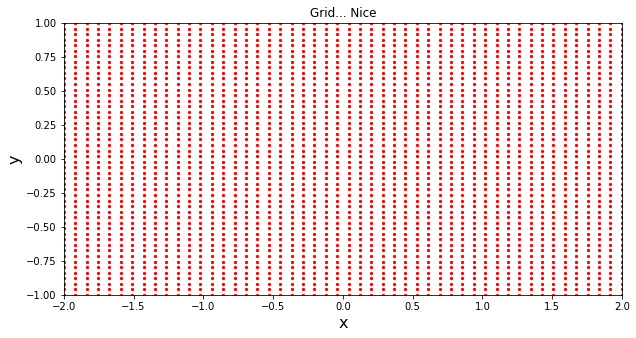

In [20]:
width=10.
height=(y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width,height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Grid... Nice')
pyplot.scatter(X,Y, s=5, color='red',marker = 'o');
# This is the grid where we calculate our streamlines, etc.


#### Define Source Flow

In [54]:
strength_source = 5.0
x_source, y_source = -1., 0.

u_source = strength_source/(2*math.pi) * ( ( X-x_source) / ((X-x_source)**2 + (Y - y_source)**2))  #define x-component of velocity

v_source = strength_source/(2*math.pi) * ( ( Y-y_source) / ((X-x_source)**2 + (Y - y_source)**2))

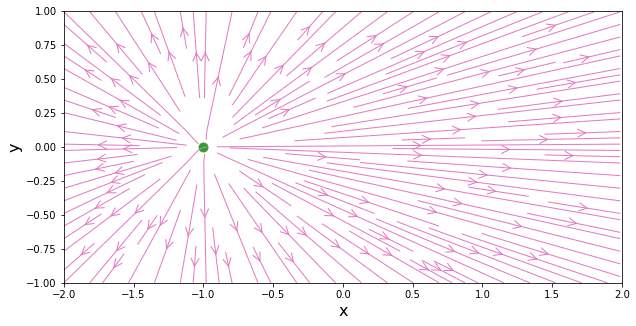

In [55]:
# Figure for Streamlines...
width=10.
height=(y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width,height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)

pyplot.streamplot(X, Y, u_source, v_source, density=1.5, linewidth=1,arrowsize=2, arrowstyle='->', color = 'C6')
pyplot.scatter(x_source, y_source, color = 'C2', s=80, marker='o')

### Define Sink

In [73]:
strength_sink = -5.0
x_sink, y_sink = 1., 0.

u_sink = strength_sink/(2*math.pi) * ( ( X-x_sink) / ((X-x_sink)**2 + (Y - y_sink)**2))  #define x-component of velocity

v_sink = strength_sink/(2*math.pi) * ( ( Y-y_sink) / ((X-x_sink)**2 + (Y - y_sink)**2))  #define y-component of velocity

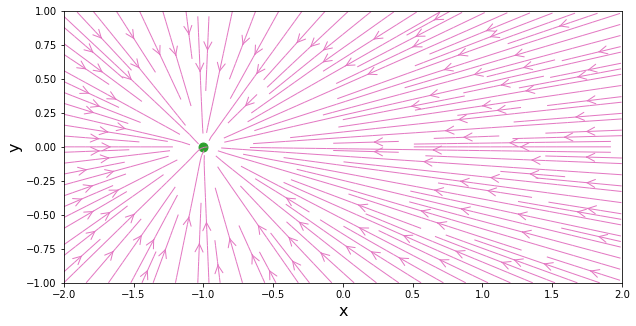

In [72]:
# Figure for Streamlines...
width=10.
height=(y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width,height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)

pyplot.streamplot(X, Y, u_sink, v_sink, density=1.75, linewidth=1,arrowsize=2, arrowstyle='->', color = 'C6')
pyplot.scatter(x_sink, y_sink, color = 'C2', s=80, marker='o')

### Combining Source and Sink

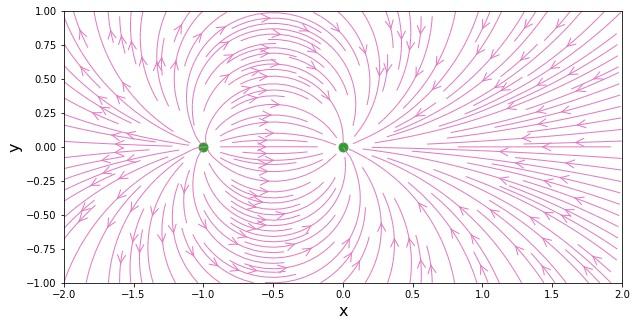

In [68]:
u_combo = u_source + u_sink
v_combo = v_source + v_sink
# Figure for Streamlines...
width=10.
height=(y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width,height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)

pyplot.streamplot(X, Y, u_combo, v_combo, density=1.75, linewidth=1,arrowsize=2, arrowstyle='->', color = 'C6')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color = 'C2', s=80, marker='o')

In [118]:
phi_source = (strength_source/(2*math.pi)) * (1/2) * np.log((X-x_source)**2 + (Y-y_source)**2);
phi_sink = (strength_sink/(2*math.pi)) * (1/2) * np.log((X-x_sink)**2 + (Y-y_sink)**2)

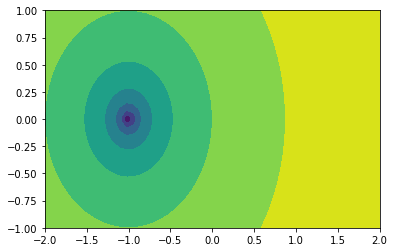

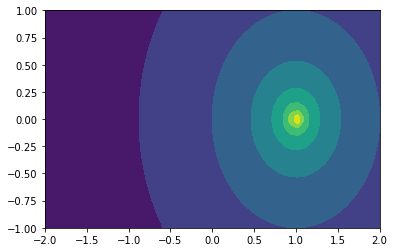

In [119]:
pyplot.contourf(X, Y, phi_source)
pyplot.figure()
pyplot.contourf(X, Y, phi_sink)

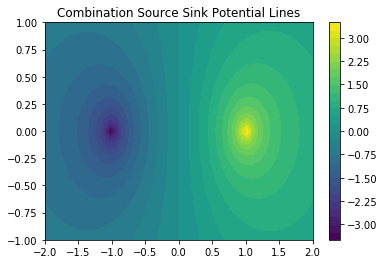

In [136]:
phi_combo = phi_source + phi_sink
pyplot.contourf(X, Y, phi_combo, 30)
pyplot.colorbar(cmap='hsv', extend='both')
pyplot.title("Combination Source Sink Potential Lines");